Original ADF p-value: 0.17762099829132505
Differenced ADF p-value: 2.4234117859977578e-05


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


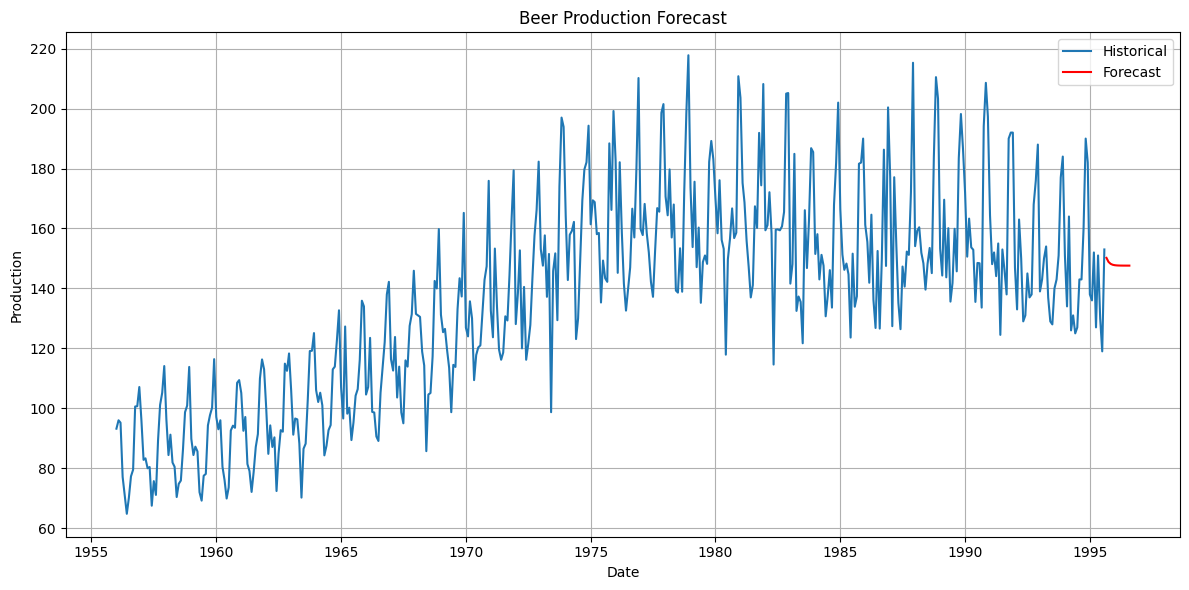

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv("monthly-beer.csv")

# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.rename(columns={'Monthly beer production': 'Production'}, inplace=True)

# Check for stationarity
adf_result = adfuller(df['Production'])
print(f"Original ADF p-value: {adf_result[1]}")

# Difference the series once if not stationary
df_diff = df['Production'].diff().dropna()
adf_diff_result = adfuller(df_diff)
print(f"Differenced ADF p-value: {adf_diff_result[1]}")

# Fit ARIMA model (you can tweak the order)
model = ARIMA(df['Production'], order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Production'], label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Beer Production Forecast')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()